# Sentiment Analysis
In this exercise, we will explore a movie review dataset.


**Task 1:** Load the data from `/dsa/data/all_datasets/movie_reviews` into mvr variable. While loading use `encoding='utf-8'`. (Solved for you)


In [22]:
from sklearn.datasets import load_files

data_dir = '/dsa/data/all_datasets/movie_reviews'

mvr = load_files(data_dir, encoding = 'utf-8')

In [23]:
mvr.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [24]:
print('Number of Reviews: {0}'.format(len(mvr.filenames)))

Number of Reviews: 2000


**Task 2:** Apply `SentimentIntensityAnalyzer` on the entire dataset to estimate polarity scores. Print the top 3 `positive`, `negative`, and `neural` reviews based on the following rule: 


* positive sentiment: compound score >= 0.05
* neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
* negative sentiment: compound score <= -0.05

In [25]:
reviews = [re.sub(r'@(\w+)', ' ', r) for r in mvr['data']]

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report

In [29]:
analyzer = SentimentIntensityAnalyzer()
reviews_sentiment = [analyzer.polarity_scores(r) for r in reviews]

df = pd.DataFrame(reviews_sentiment)
df['review'] = reviews

In [50]:
df[df['compound'] >= 0.05].sort_values(by=['compound'], ascending=False).head(3)

,neg,neu,pos,compound,review
1338,0.044,0.668,0.288,0.9999,as i write the review for the new hanks/ryan r...
1351,0.038,0.675,0.287,0.9999,note : some may consider portions of the follo...
1157,0.055,0.732,0.213,0.9998,i actually am a fan of the original 1961 or so...


In [53]:
df[(df['compound'] > -0.05) & (df['compound'] < 0.05)].head(3) # based on the rules given, there is only one "neutral"

,neg,neu,pos,compound,review
1014,0.104,0.799,0.097,-0.0488,"pulp fiction , quentin tarantino's anxiously a..."


In [52]:
df[df['compound'] <= -0.05].sort_values(by=['compound'], ascending=True).head(3)

,neg,neu,pos,compound,review
1420,0.166,0.758,0.077,-0.9997,"the above is dialogue from this film , taken a..."
1001,0.175,0.705,0.120,-0.9996,natural born killers is really a very simple s...
1031,0.224,0.692,0.084,-0.9996,weighed down by tired plot lines and spielberg...


**Task 3:** Apply `SentimentIntensityAnalyzer` on the entire dataset to estimate polarity scores. Print a classification report based on the following rule: 


positive sentiment: compound score >= 0
negative sentiment: compound score < 0

In [66]:
df['sentiment'] = 'NEU'
df.loc[df['compound'] >= 0, 'sentiment'] = 'POS'
df.loc[df['compound'] < 0, 'sentiment'] = 'NEG'

df.head()

,neg,neu,pos,compound,review,sentiment
0,0.153,0.678,0.169,0.6567,arnold schwarzenegger has been an icon for act...,POS
1,0.075,0.802,0.123,0.9783,good films are hard to find these days . \ngre...,POS
2,0.083,0.766,0.151,0.9827,quaid stars as a man who has taken up the prof...,POS
3,0.095,0.801,0.104,-0.8142,we could paraphrase michelle pfieffer's charac...,NEG
4,0.015,0.835,0.150,0.9538,kolya is one of the richest films i've seen in...,POS


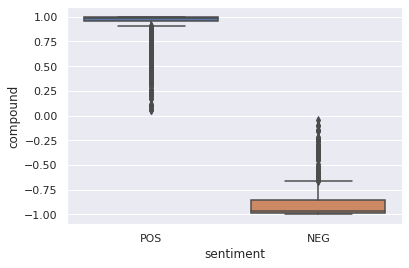

In [67]:
import seaborn as sns
sns.set()
sns.boxplot(x="sentiment", y="compound", data=df);

In [78]:
new_mvr = {key: mvr[key] for key in mvr.keys()
                               & {'data', 'target'}}

In [80]:
y_true = pd.DataFrame(new_mvr)["target"].map({1: 'POS', 0: 'NEG'}) # had to convert to df to map
y_pred = df['sentiment']
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         NEG       0.72      0.44      0.55      1000
         POS       0.60      0.83      0.69      1000

    accuracy                           0.64      2000
   macro avg       0.66      0.64      0.62      2000
weighted avg       0.66      0.64      0.62      2000

